In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2

sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from Regressions import *

In [4]:
y_tr, X_tr, ids_tr = load_csv_data('../Data/train.csv')
y_te, X_te, ids_te = load_csv_data('../Data/test.csv')

In [5]:
y_tr[y_tr==-1] = 0
y_te[y_te==-1] = 0

# Training data preparation

## Neutral data

In [5]:
X_tr_neutral = preliminary_treatment_X(X_tr, imp_method="median")


## Logarithmic data

In [6]:
x_nan = X_tr.copy()
x_nan[x_nan==-999]=np.nan

# add log transformations
x_nan[:,3] = log_plus(x_nan[:,3], 3)
x_nan[:,8] = log_plus(x_nan[:,8], 1)
x_nan[:,13] = log_plus(x_nan[:,13], 1)
x_nan[:,16] = log_plus(x_nan[:,16], 1)
x_nan[:,19] = log_plus(x_nan[:,19], 2)
x_nan[:,23] = log_plus(x_nan[:,23], 2)
x_nan[:,29] = log_plus(x_nan[:,29], 1)

# transform nan back into -999
x_nan[np.isnan(x_nan)]=-999

X_tr_log = preliminary_treatment_X(x_nan, imp_method="mean")

## Cleaned data

In [6]:
def outlier_cleaning(data, y, features_treated = "all", m=2.5):
    if features_treated == "all":
        #features_treated = range(0,data.shape[1])
        features_treated = np.delete(np.arange(data.shape[1]),[22])
        
        
    data_clean = data.copy()
    y_clean = y.copy()
    
    for i in features_treated:
        feature = data_clean[:,i]
        outliers = abs(feature - np.nanmean(feature)) > m * np.nanstd(feature)
        data_clean = data_clean[~outliers,:]
        y_clean = y_clean[~outliers]
    return data_clean, y_clean

In [7]:
x_nan = X_tr.copy()
x_nan[x_nan==-999]=np.nan
y_clean = y_tr.copy()
x_clean, y_clean = outlier_cleaning(x_nan, y_clean, "all")

#transform nan back into -999
x_clean[np.isnan(x_clean)]=-999

X_tr_clean = preliminary_treatment_X(x_clean, imp_method="median")

/home/william/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':


## Interaction data with Feature 22

In [241]:
X_tr_inter = X_tr_neutral.copy()
for i in range(4):
    for j in range(4,23):
        X_tr_inter = interactions(X_tr_inter,i,j)

# Testing different methods on training data

### Tests for feature selection

In [262]:
x_nan = X_tr.copy()
x_nan[x_nan==-999]=np.nan

# add log transformations
x_nan[:,3] = log_plus(x_nan[:,3], 3)
x_nan[:,8] = log_plus(x_nan[:,8], 1)
x_nan[:,13] = log_plus(x_nan[:,13], 1)
x_nan[:,16] = log_plus(x_nan[:,16], 1)
x_nan[:,19] = log_plus(x_nan[:,19], 2)
x_nan[:,23] = log_plus(x_nan[:,23], 2)
x_nan[:,29] = log_plus(x_nan[:,29], 1)

# transform nan back into -999
x_nan[np.isnan(x_nan)]=-999

features = np.zeros(30,dtype=bool)
keepers = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,16,19,21,22,23,26,29]
features[keepers] = True
## treat it

X_tr_log = preliminary_treatment_X(x_nan, imp_method="median") 

Testing for method ridge_regression with transf. id([])... Be patient! ;)
[<function ridge_regression at 0x1a686cf7b8>, 7.196856730011529e-06] [<function id at 0x10c37bc80>, []]


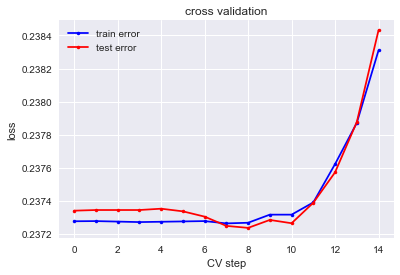

In [284]:
tx = X_tr_log
y_tr = y_tr
w = np.zeros(tx.shape[1])
# lambdas = [10**(-5.5625)]
lambdas = np.logspace(-8,-3,15)
k_fold = 5

transformations = [[id,[]]]

methods = [[ridge_regression, lambdas]]

predictor, w, loss_tr, loss_te, transformation, method = multi_cross_validation(y_tr, tx, k_fold, transformations=transformations, methods=methods, seed=2)

print(method, transformation)

In [285]:
func, par = method
predictor, w, loss = func(y_tr, tx, par, pred = True)
loss

0.237332

### Big table generation

Testing for method logistic_regression with transf. id([])... Be patient! ;)
[<function logistic_regression at 0x1a686cf950>, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])] [<function id at 0x10c37bc80>, []]


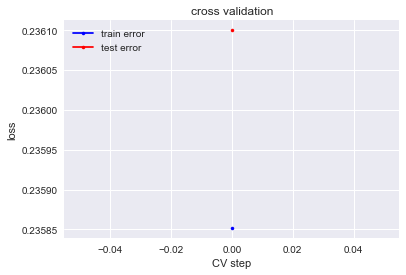

In [242]:
#set the training data to be used
tx = X_tr_inter
y_tr = y_tr
w = np.zeros(tx.shape[1])
# define the lambdas range
lambdas = np.logspace(-6,-2,15)
k_fold = 5


transformations = [[id,[]]]

methods = [[logistic_regression, [w]]]

predictor, w, loss_tr, loss_te, transformation, method = multi_cross_validation(y_tr, tx, k_fold, transformations=transformations, methods=methods, seed=1, only_best=True)

print(method, transformation)

In [243]:
func, par = method
predictor, w, loss = func(y_tr, tx, par, pred = True)
loss

0.23574

In [ ]:
#set the training data to be used
tx = X_tr_log
y_tr = y_tr
w = np.zeros(tx.shape[1])
# define the lambdas range
lambdas = np.logspace(-9,0,15)
k_fold = 5


transformations = [[id,[]]]

methods = [[reg_logistic_regression, lambdas]]

predictor, w, loss_tr, loss_te, transformation, method = multi_cross_validation(y_tr, tx, k_fold, transformations=transformations, methods=methods, seed=1, only_best=True)

print(method, transformation)

Testing for method reg_logistic_regression with transf. id([])... Be patient! ;)


In [245]:
func, par = method
predictor, w, loss = func(y_tr, tx, par, pred = True)
loss

0.319128

Testing for method least_squares_GD with transf. id([])... Be patient! ;)
[<function least_squares_GD at 0x1a686cf620>, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])] [<function id at 0x10c37bc80>, []]


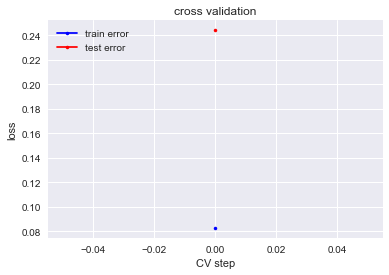

In [246]:
#set the training data to be used
tx = X_tr_inter
y_tr = y_tr
w = np.zeros(tx.shape[1])
# define the lambdas range
lambdas = np.logspace(-6,-2,15)
k_fold = 5


transformations = [[id,[]]]

methods = [[least_squares_GD, [w]]]

predictor, w, loss_tr, loss_te, transformation, method = multi_cross_validation(y_tr, tx, k_fold, transformations=transformations, methods=methods, seed=1, only_best=True)

print(method, transformation)

Testing for method least_squares_SGD with transf. id([])... Be patient! ;)
[<function least_squares_SGD at 0x1a686cf6a8>, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])] [<function id at 0x10c37bc80>, []]


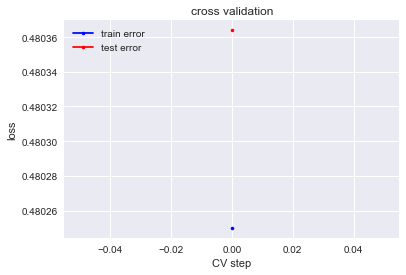

In [247]:
#set the training data to be used
tx = X_tr_inter
y_tr = y_tr
w = np.zeros(tx.shape[1])
# define the lambdas range
lambdas = np.logspace(-6,-2,15)
k_fold = 5


transformations = [[id,[]]]

methods = [[least_squares_SGD, [w]]]

predictor, w, loss_tr, loss_te, transformation, method = multi_cross_validation(y_tr, tx, k_fold, transformations=transformations, methods=methods, seed=1, only_best=True)

print(method, transformation)

In [248]:
func, par = method
predictor, w, loss = func(y_tr, tx, par, pred = True)
loss

0.44922

## Simple cross validation

In [58]:
cross_validation(y_tr, tx, k_fold, reg_logistic_regression, gamma = 0.0005, k_indices=None, seed=1)

TypeError: cross_validation() got an unexpected keyword argument 'gamma'

## Interaction and Logarithmic transformation

In [70]:
x_nan = X_tr.copy()
x_nan[x_nan==-999]=np.nan

# add log transformations
x_nan[:,3] = log_plus(x_nan[:,3], 3)
x_nan[:,8] = log_plus(x_nan[:,8], 1)
x_nan[:,13] = log_plus(x_nan[:,13], 1)
x_nan[:,16] = log_plus(x_nan[:,16], 1)
x_nan[:,19] = log_plus(x_nan[:,19], 2)
x_nan[:,23] = log_plus(x_nan[:,23], 2)
x_nan[:,29] = log_plus(x_nan[:,29], 1)

# transform nan back into -999
x_nan[np.isnan(x_nan)]=-999

X_tr_log = preliminary_treatment_X(x_nan, imp_method="median")

X_tr_loginter = X_tr_log.copy()
for i in range(4):
    for j in range(4,23):
        X_tr_loginter = interactions(X_tr_loginter,i,j)

Testing for method ridge_regression with transf. id([])... Be patient! ;)
[<function ridge_regression at 0x10c35ac80>, 0.0003727593720314938] [<function id at 0x10ab26840>, []]


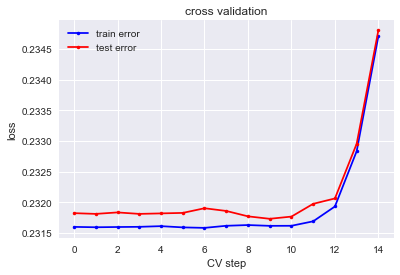

In [72]:
#set the training data to be used
tx = X_tr_loginter
y_tr = y_tr
w = np.zeros(tx.shape[1])
# define the lambdas range
lambdas = np.logspace(-6,-2,15)
k_fold = 5


transformations = [[id,[]]]

methods = [[ridge_regression, lambdas]]

predictor, w, loss_tr, loss_te, transformation, method = multi_cross_validation(y_tr, tx, k_fold, transformations=transformations, methods=methods, seed=1, only_best=True)

print(method, transformation)

In [73]:
func, par = method
predictor, w, loss = func(y_tr, tx, par, pred = True)
loss

0.231684

## Feature selection

### All lasso out 

In [271]:
x_nan = X_tr.copy()
x_nan[x_nan==-999]=np.nan

# add log transformations
x_nan[:,3] = log_plus(x_nan[:,3], 3)
x_nan[:,8] = log_plus(x_nan[:,8], 1)
x_nan[:,13] = log_plus(x_nan[:,13], 1)
x_nan[:,16] = log_plus(x_nan[:,16], 1)
x_nan[:,19] = log_plus(x_nan[:,19], 2)
x_nan[:,23] = log_plus(x_nan[:,23], 2)
x_nan[:,29] = log_plus(x_nan[:,29], 1)

# transform nan back into -999
x_nan[np.isnan(x_nan)]=-999

## take phi and eta and sumet out
features = np.zeros(30,dtype=bool)
keepers = [1,2,3,4,5,6,7,8,9,10,11,12,13,16,19,22,23,26,29]
features[keepers] = True
## treat it
X_treated = preliminary_treatment_X(x_nan, features, imp_method="median")

X_tr_loginter_lassout = X_treated.copy()
for i in range(4):
    for j in range(4,23):
        X_tr_loginter_lassout = interactions(X_tr_loginter_lassout,i,j)

Testing for method ridge_regression with transf. id([])... Be patient! ;)
[<function ridge_regression at 0x1a686cf7b8>, 1.3894954943731361e-05] [<function id at 0x10c37bc80>, []]


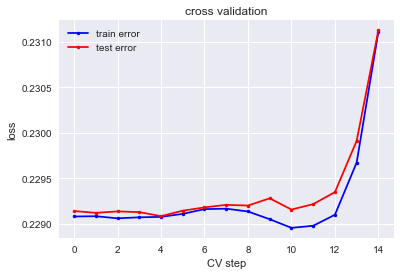

In [272]:
#set the training data to be used
tx = X_tr_loginter_lassout
w = np.zeros(tx.shape[1])
# define the lambdas range
lambdas = np.logspace(-6,-2,15)
k_fold = 5


transformations = [[id,[]]]

methods = [[ridge_regression, lambdas]]

predictor, w, loss_tr, loss_te, transformation, method = multi_cross_validation(y_tr, tx, k_fold, transformations=transformations, methods=methods, seed=1, only_best=True)

print(method, transformation)

In [273]:
func, par = method
predictor, w, loss = func(y_tr, tx, par, pred = True)
loss

0.229028

### All lasso out and cleaning with changing m

In [176]:
x_nan = X_tr.copy()
x_nan[x_nan==-999]=np.nan

# add log transformations
x_nan[:,3] = log_plus(x_nan[:,3], 3)
x_nan[:,8] = log_plus(x_nan[:,8], 1)
x_nan[:,13] = log_plus(x_nan[:,13], 1)
x_nan[:,16] = log_plus(x_nan[:,16], 1)
x_nan[:,19] = log_plus(x_nan[:,19], 2)
x_nan[:,23] = log_plus(x_nan[:,23], 2)
x_nan[:,29] = log_plus(x_nan[:,29], 1)

y_clean = y_tr.copy()
x_clean, y_clean = outlier_cleaning(x_nan, y_clean, "all", m=2.5)

#transform nan back into -999
x_clean[np.isnan(x_clean)]=-999

## take phi and eta and sumet out
features = np.zeros(30,dtype=bool)
keepers = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,16,19,21,22,23,26,29]
features[keepers] = True
## treat it
X_treated = preliminary_treatment_X(x_clean, features, imp_method="median")

X_tr_loginter_lassout_m = X_treated.copy()
for i in range(4):
    for j in range(4,23):
        X_tr_loginter_lassout_m = interactions(X_tr_loginter_lassout_m,i,j)

/Users/Marie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':


In [177]:
X_tr_loginter_lassout_m.shape

(200537, 99)

Testing for method ridge_regression with transf. id([])... Be patient! ;)
[<function ridge_regression at 0x1a55be88c8>, 1.9306977288832497e-07] [<function id at 0x10ab26840>, []]


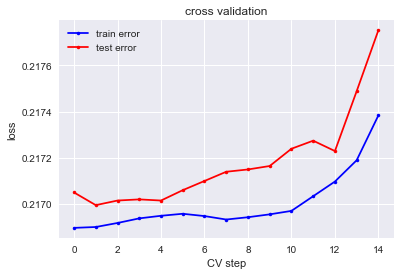

In [111]:
#set the training data to be used
tx = X_tr_loginter_lassout_m
w = np.zeros(tx.shape[1])
# define the lambdas range
lambdas = np.logspace(-7,-3,15)
k_fold = 5


transformations = [[id,[]]]

methods = [[ridge_regression, lambdas]]

predictor, w, loss_tr, loss_te, transformation, method = multi_cross_validation(y_clean, tx, k_fold, transformations=transformations, methods=methods, seed=1, only_best=True)

print(method, transformation)

In [112]:
func, par = method
predictor, w, loss = func(y_clean, tx, par, pred = True)
loss

0.21686771019811804

## Submission

In [81]:
def predict_labels(w,tx):
    return tx.dot(w)

In [82]:
x_nan = X_te.copy()
x_nan[x_nan==-999]=np.nan

# add log transformations
x_nan[:,3] = log_plus(x_nan[:,3], 3)
x_nan[:,8] = log_plus(x_nan[:,8], 1)
x_nan[:,13] = log_plus(x_nan[:,13], 1)
x_nan[:,16] = log_plus(x_nan[:,16], 1)
x_nan[:,19] = log_plus(x_nan[:,19], 2)
x_nan[:,23] = log_plus(x_nan[:,23], 2)
x_nan[:,29] = log_plus(x_nan[:,29], 1)

# transform nan back into -999
x_nan[np.isnan(x_nan)]=-999

## take phi and eta and sumet out
features = np.zeros(30,dtype=bool)
keepers = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,16,19,21,22,23,26,29]
features[keepers] = True
## treat it
X_treated = preliminary_treatment_X(x_nan, features, imp_method="median")

X_te_loginter_lassout = X_treated.copy()
for i in range(4):
    for j in range(4,23):
        X_te_loginter_lassout = interactions(X_te_loginter_lassout,i,j)

In [119]:
tx = X_te_loginter_lassout
y_pred = predict_labels(w,tx)
y_predict = categories(y_pred)

In [120]:
y_predict[y_predict==0]=-1
y_predict

array([-1., -1., -1., ...,  1., -1., -1.])

In [121]:
create_csv_submission(ids_te, y_predict, "../Data/test_Marie_283.csv")

## Avec polynomial, eta and phi out, log and interactions with the linear term

In [12]:
x_nan = X_tr.copy()
x_nan[x_nan==-999]=np.nan

# add log transformations
x_nan[:,3] = log_plus(x_nan[:,3], 3)
x_nan[:,8] = log_plus(x_nan[:,8], 1)
x_nan[:,13] = log_plus(x_nan[:,13], 1)
x_nan[:,16] = log_plus(x_nan[:,16], 1)
x_nan[:,19] = log_plus(x_nan[:,19], 2)
x_nan[:,23] = log_plus(x_nan[:,23], 2)
x_nan[:,29] = log_plus(x_nan[:,29], 1)

# transform nan back into -999
x_nan[np.isnan(x_nan)]=-999

## take phi and eta and sumet out
features = np.zeros(30,dtype=bool)
keepers = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,16,19,21,22,23,26,29]
features[keepers] = True
## treat it
X_treated = preliminary_treatment_X(x_nan, features, imp_method="median")

X_poly = build_poly(X_treated, 4)

X_tr_loginter_lassout_poly = X_poly.copy()
for i in range(4):
    for j in range(4, X_poly.shape[1], 4):
        X_tr_loginter_lassout_poly = interactions(X_tr_loginter_lassout_poly,i,j)

In [13]:
X_tr_loginter_lassout_poly.shape

(250000, 164)

In [ ]:
ridge regression

Testing for method ridge_regression with transf. id([])... Be patient! ;)
[<function ridge_regression at 0x7f58048a5ea0>, 2.2758459260747865e-07] [<function id at 0x7f58048a5158>, []]


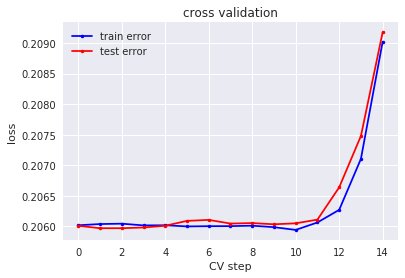

In [14]:
#set the training data to be used
tx = X_tr_loginter_lassout_poly
w = np.zeros(tx.shape[1])
# define the lambdas range
lambdas = np.logspace(-7,-2,15)
k_fold = 5


transformations = [[id,[]]]

methods = [[ridge_regression, lambdas]]

predictor, w, loss_tr, loss_te, transformation, method = multi_cross_validation(y_tr, tx, k_fold, transformations=transformations, methods=methods, seed=1, only_best=True)

print(method, transformation)

In [15]:
func, par = method
predictor, w, loss = func(y_tr, tx, par, pred = True)
loss

0.206028

In [ ]:
logistic regression

Testing for method logistic_regression with transf. id([])... Be patient! ;)


/home/charles/Desktop/machine learning/projets/ML_CS433_projet1/src/costs.py:14: RuntimeWarning: overflow encountered in exp
  return np.exp(z)/(1+np.exp(z))
/home/charles/Desktop/machine learning/projets/ML_CS433_projet1/src/costs.py:14: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(z)/(1+np.exp(z))
/home/charles/Desktop/machine learning/projets/ML_CS433_projet1/src/data_utility.py:325: RuntimeWarning: invalid value encountered in greater_equal
  y_cat[y_hat >= 0.5] = 1
/home/charles/Desktop/machine learning/projets/ML_CS433_projet1/src/data_utility.py:326: RuntimeWarning: invalid value encountered in less
  y_cat[y_hat < 0.5] = 0


[<function logistic_regression at 0x7f58048a60d0>, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])] [<function id at 0x7f58048a5158>, []]


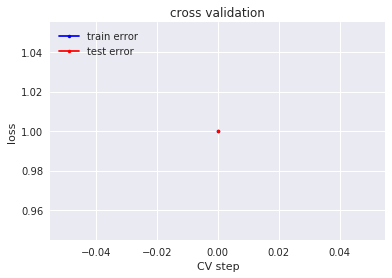

In [16]:
#set the training data to be used
tx = X_tr_loginter_lassout_poly
y_tr = y_tr
w = np.zeros(tx.shape[1])
# define the lambdas range
lambdas = np.logspace(-6,-2,15)
k_fold = 5


transformations = [[id,[]]]

methods = [[logistic_regression, [w]]]

predictor, w, loss_tr, loss_te, transformation, method = multi_cross_validation(y_tr, tx, k_fold, transformations=transformations, methods=methods, seed=1, only_best=True)

print(method, transformation)

## Submission

In [154]:
x_nan = X_te.copy()
x_nan[x_nan==-999]=np.nan

# add log transformations
x_nan[:,3] = log_plus(x_nan[:,3], 3)
x_nan[:,8] = log_plus(x_nan[:,8], 1)
x_nan[:,13] = log_plus(x_nan[:,13], 1)
x_nan[:,16] = log_plus(x_nan[:,16], 1)
x_nan[:,19] = log_plus(x_nan[:,19], 2)
x_nan[:,23] = log_plus(x_nan[:,23], 2)
x_nan[:,29] = log_plus(x_nan[:,29], 1)

# transform nan back into -999
x_nan[np.isnan(x_nan)]=-999

## take phi and eta and sumet out
features = np.zeros(30,dtype=bool)
keepers = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,16,19,21,22,23,26,29]
features[keepers] = True
## treat it
X_treated = preliminary_treatment_X(x_nan, features, imp_method="median")

X_poly = build_poly(X_treated, 4)

X_te_loginter_lassout_poly = X_poly.copy()
for i in range(4):
    for j in range(4,X_poly.shape[1],4):
        X_te_loginter_lassout_poly = interactions(X_te_loginter_lassout_poly,i,j)

In [159]:
tx = X_te_loginter_lassout_poly
y_pred = predict_labels(w,tx)
y_predict = categories(y_pred)

In [160]:
y_predict[y_predict==0]=-1
y_predict

array([-1., -1., -1., ...,  1., -1., -1.])

In [161]:
create_csv_submission(ids_te, y_predict, "../Data/test_Marie_285.csv")

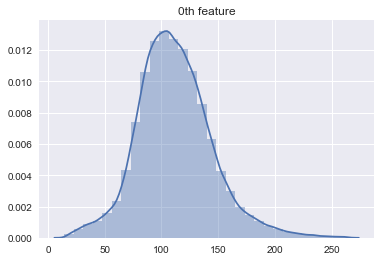

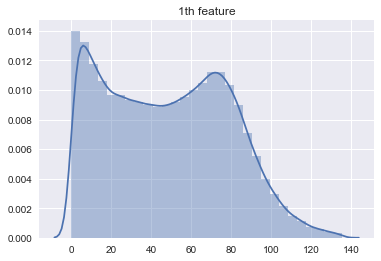

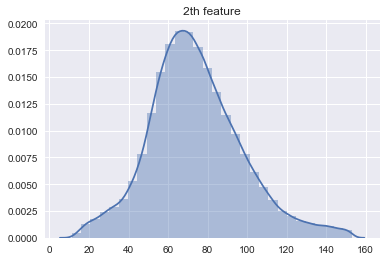

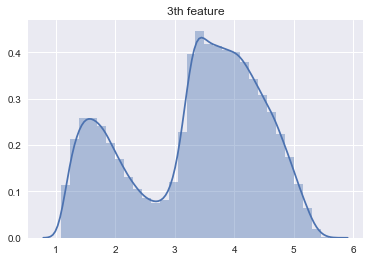

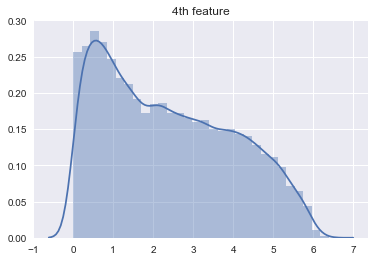

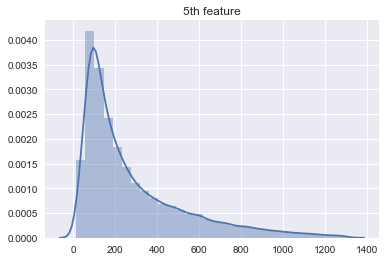

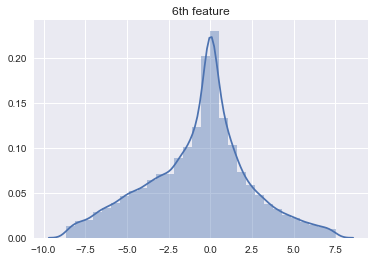

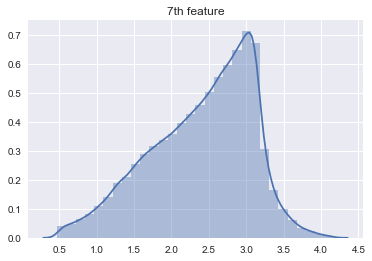

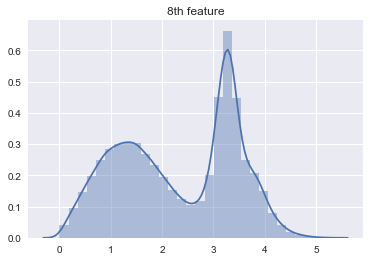

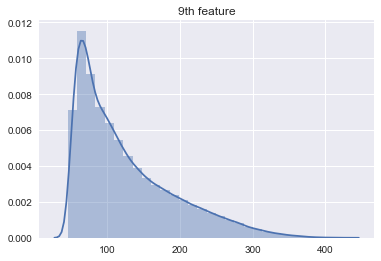

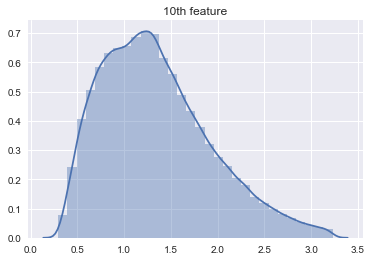

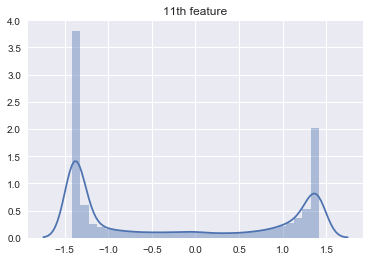

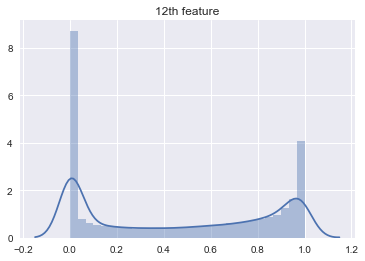

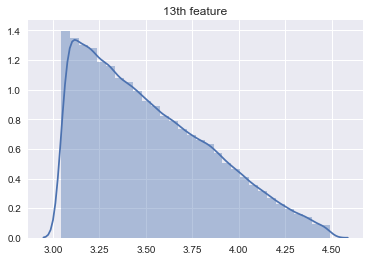

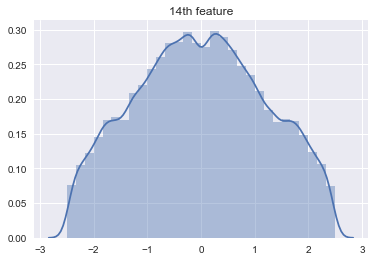

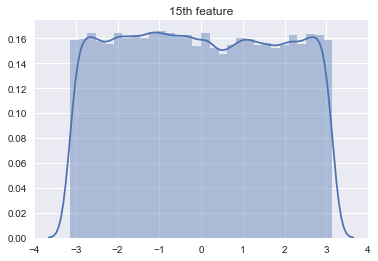

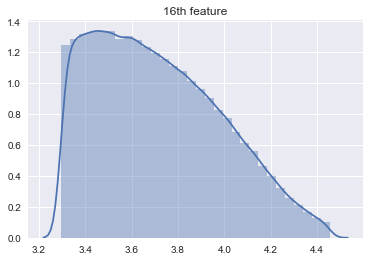

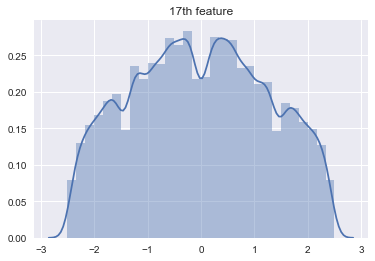

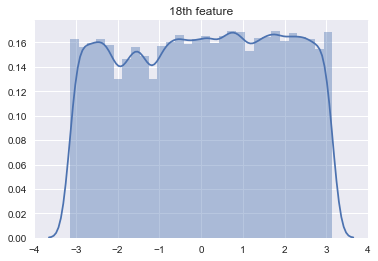

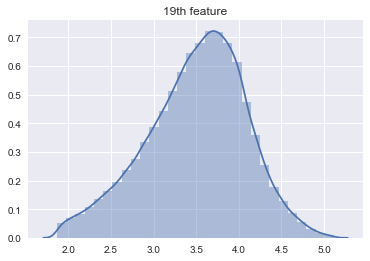

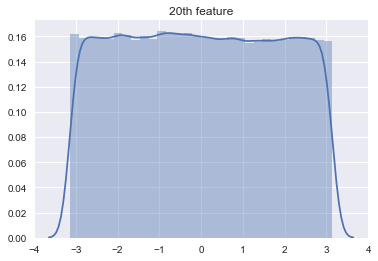

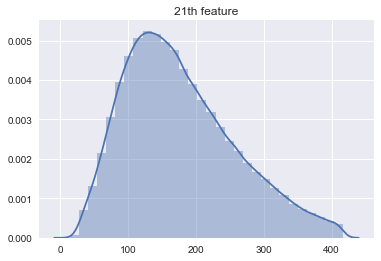

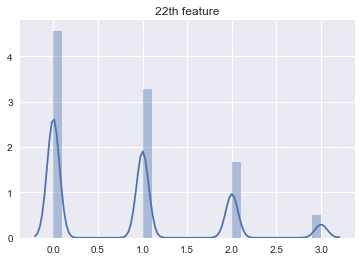

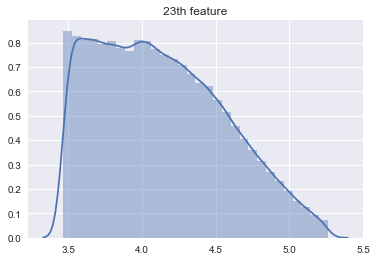

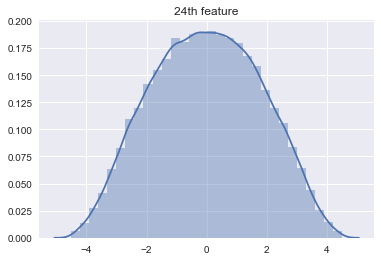

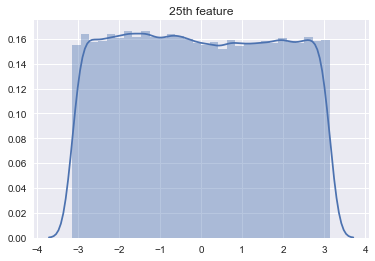

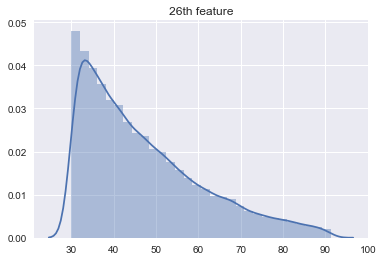

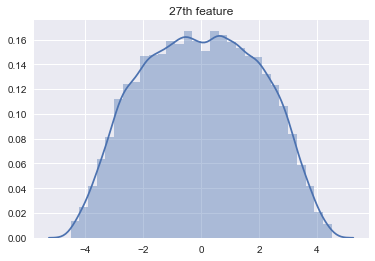

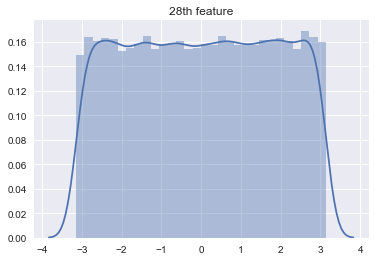

In [281]:
which = range(0,29)
for i in which:
    feature = x_clean[:,i]
    feature = feature[feature>-999]
#     hist_plot(feature,i)
    sns.distplot(feature,bins=30,kde=True)
    plt.title('{i}th feature'.format(i=i))
    plt.show()

Testing for method ridge_regression with transf. id([])... Be patient! ;)


NameError: name 'func' is not defined

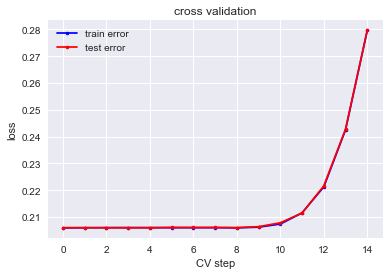

In [290]:
from run import *